# SL VI Mini Project
## Stock Market Analysis
### Group Id 3

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime as dt #for getting date
from nsepy import get_history as gh # for importing nse datasets
import dateutil.relativedelta as dr # for date operation
%matplotlib inline
import matplotlib.pyplot as plt #for visualization
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(14,8))
plt.rc('lines', markersize=4)
import warnings
warnings.filterwarnings("ignore")

### Loading Data using NSEPy Library

In [2]:
end=dt.date.today()
start=end-dr.relativedelta(days=360)

stk_data = gh(symbol='SBIN',start=start,end=end)

In [3]:
data=stk_data

### Analyzing Dataset

In [4]:
#displaying top 5 entries
data.head()

Symbol Series  Prev Close   Open    High     Low    Last   Close  \
Date                                                                          
2020-06-16   SBIN     EQ      173.70  178.0  178.95  169.40  172.55  172.90   
2020-06-17   SBIN     EQ      172.90  171.0  176.20  169.25  172.80  172.95   
2020-06-18   SBIN     EQ      172.95  172.4  180.65  171.10  180.00  179.65   
2020-06-19   SBIN     EQ      179.65  180.3  184.95  179.50  184.25  184.50   
2020-06-22   SBIN     EQ      184.50  185.0  191.75  184.25  187.90  187.70   

              VWAP    Volume      Turnover  Trades  Deliverable Volume  \
Date                                                                     
2020-06-16  174.16  63929925  1.113374e+15  295248             9484014   
2020-06-17  173.19  73867145  1.279334e+15  337640            10915007   
2020-06-18  176.37  58262367  1.027583e+15  274070            12595472   
2020-06-19  182.93  76897890  1.406723e+15  324544            15049467   
2020-06-22  188.68  80024673  1.509941e+15  412445            16662588   

            %Deliverble  
Date                     
2020-06-16       0.1484  
2020-06-17       0.1478  
2020-06-18       0.2162  
2020-06-19       0.1957  
2020-06-22       0.2082

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, 2020-06-16 to 2021-06-11
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              249 non-null    object 
 1   Series              249 non-null    object 
 2   Prev Close          249 non-null    float64
 3   Open                249 non-null    float64
 4   High                249 non-null    float64
 5   Low                 249 non-null    float64
 6   Last                249 non-null    float64
 7   Close               249 non-null    float64
 8   VWAP                249 non-null    float64
 9   Volume              249 non-null    int64  
 10  Turnover            249 non-null    float64
 11  Trades              249 non-null    int64  
 12  Deliverable Volume  249 non-null    int64  
 13  %Deliverble         249 non-null    float64
dtypes: float64(9), int64(3), object(2)
memory usage: 29.2+ KB


In [6]:
#showing columns
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [7]:
data.describe()

Prev Close        Open        High         Low        Last       Close  \
count  249.000000  249.000000  249.000000  249.000000  249.000000  249.000000   
mean   276.348394  277.364458  281.836345  272.774900  277.517068  277.376104   
std     84.072545   84.466617   85.667620   83.153914   84.486972   84.376226   
min    172.900000  171.000000  176.200000  169.250000  172.550000  172.900000   
25%    195.450000  196.000000  199.100000  192.500000  195.700000  195.600000   
50%    263.000000  263.800000  268.850000  255.600000  264.050000  263.500000   
75%    358.250000  360.000000  364.300000  354.550000  358.200000  358.550000   
max    439.650000  437.500000  441.950000  433.500000  439.050000  439.650000   

             VWAP        Volume      Turnover        Trades  \
count  249.000000  2.490000e+02  2.490000e+02  2.490000e+02   
mean   277.410602  5.601436e+07  1.533005e+15  3.090954e+05   
std     84.401883  2.759489e+07  9.476667e+14  1.416496e+05   
min    173.190000  7.753219e+06  1.790815e+14  7.352100e+04   
25%    195.680000  3.914786e+07  9.550262e+14  2.208730e+05   
50%    261.140000  4.917870e+07  1.325488e+15  2.777390e+05   
75%    358.650000  6.490837e+07  1.761546e+15  3.400870e+05   
max    437.300000  2.149557e+08  8.549083e+15  1.155236e+06   

       Deliverable Volume  %Deliverble  
count        2.490000e+02   249.000000  
mean         1.203947e+07     0.215116  
std          6.923657e+06     0.058696  
min          2.345791e+06     0.090000  
25%          7.523211e+06     0.170300  
50%          1.049837e+07     0.213000  
75%          1.457824e+07     0.257500  
max          4.310213e+07     0.419300

In [8]:
#checking for Null columns
data.dropna(inplace=True)
data.isnull().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [9]:
df=pd.DataFrame(data, columns=['Close','Prev Close', 'Open', 'High', 'Low', 'Last',
       'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(df)
df

Close  Prev Close    Open    High     Low    Last    VWAP  \
Date                                                                     
2020-06-16  172.90      173.70  178.00  178.95  169.40  172.55  174.16   
2020-06-17  172.95      172.90  171.00  176.20  169.25  172.80  173.19   
2020-06-18  179.65      172.95  172.40  180.65  171.10  180.00  176.37   
2020-06-19  184.50      179.65  180.30  184.95  179.50  184.25  182.93   
2020-06-22  187.70      184.50  185.00  191.75  184.25  187.90  188.68   
...            ...         ...     ...     ...     ...     ...     ...   
2021-06-07  432.25      433.60  435.10  437.40  430.80  431.30  434.78   
2021-06-08  427.20      432.25  432.25  432.50  424.00  427.40  427.47   
2021-06-09  421.45      427.20  427.50  432.30  418.20  421.95  426.58   
2021-06-10  432.25      421.45  424.90  433.30  422.40  432.40  428.67   
2021-06-11  429.60      432.25  434.85  435.50  425.25  429.40  430.04   

              Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
Date                                                                         
2020-06-16  63929925  1.113374e+15  295248             9484014       0.1484  
2020-06-17  73867145  1.279334e+15  337640            10915007       0.1478  
2020-06-18  58262367  1.027583e+15  274070            12595472       0.2162  
2020-06-19  76897890  1.406723e+15  324544            15049467       0.1957  
2020-06-22  80024673  1.509941e+15  412445            16662588       0.2082  
...              ...           ...     ...                 ...          ...  
2021-06-07  20201197  8.783035e+14  174837             6487715       0.3212  
2021-06-08  31113823  1.330030e+15  247824             9816376       0.3155  
2021-06-09  27784834  1.185249e+15  241080             6008214       0.2162  
2021-06-10  27397712  1.174471e+15  211924             7523211       0.2746  
2021-06-11  26831924  1.153870e+15  211915             6400469       0.2385  

[249 rows x 12 columns]

### Visualization using matplolib

<AxesSubplot:xlabel='Date'>

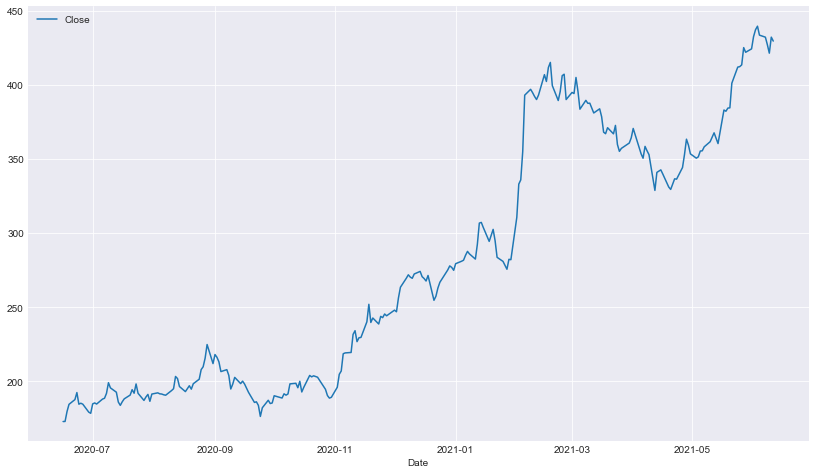

In [10]:
#plotting close values
data[["Close"]].plot()

<AxesSubplot:ylabel='Density'>

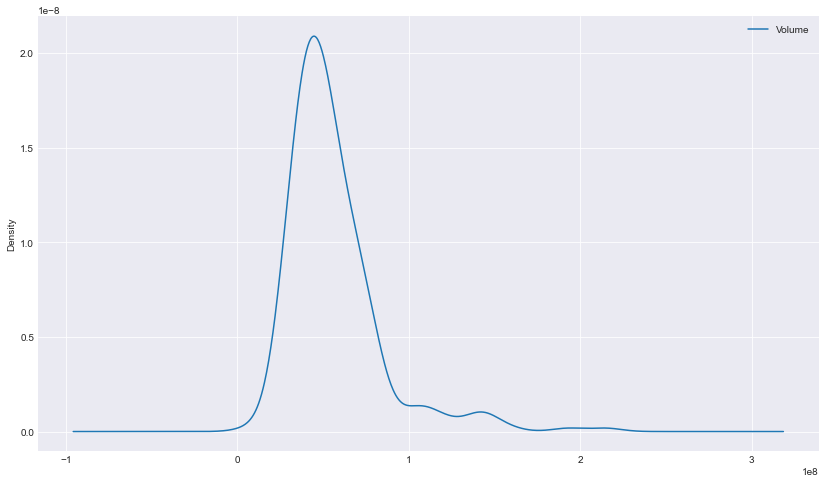

In [11]:
#plotting density of volume traded
data[["Volume"]].plot.density()

In [12]:
#selecting columns as per requirement
df = pd.DataFrame(data,columns = ['Open', 'Close'])

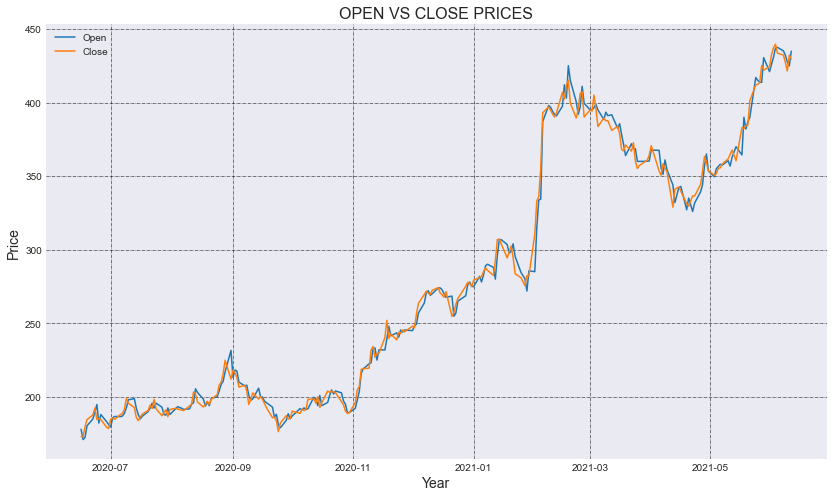

In [13]:
df.plot()
# Show the legend
plt.legend()
# Define the label for the title of the figure
plt.title("OPEN VS CLOSE PRICES", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

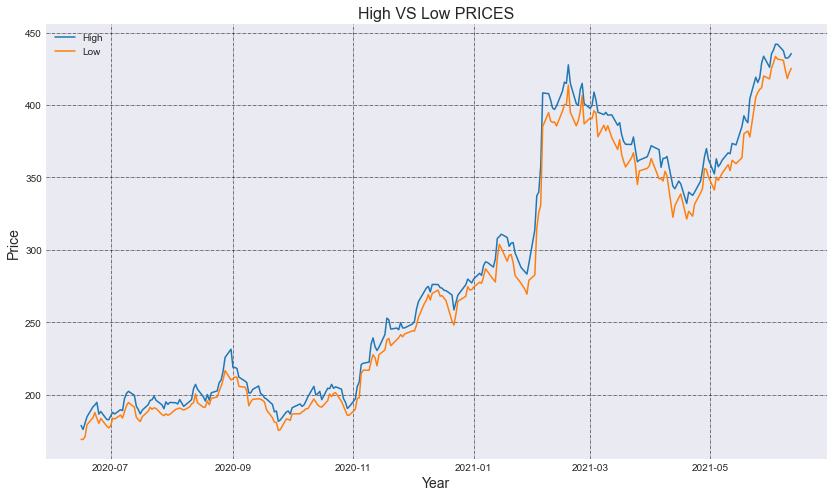

In [14]:
#selecting columns as per requirement
df = pd.DataFrame(data,columns = ['High', 'Low'])
df.plot()
# Show the legend
plt.legend()
# Define the label for the title of the figure
plt.title("High VS Low PRICES", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

### Visualization using interactive graphs with plotly

In [15]:
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']

In [16]:
fig = go.Figure(data=[go.Candlestick(x=data2['Date'],
                open=data2['Open'],
                high=data2['High'],
                low=data2['Low'],
                close=data2['Close'])])



In [17]:
fig.update_layout(
    title='SBIN',
    yaxis_title='Price in RS.',
    
)
fig.show()

### Calculation to find the percent change for each day of stock

In [18]:
data2['Daily Return'] = data2['Close'].pct_change()

<AxesSubplot:xlabel='Date'>

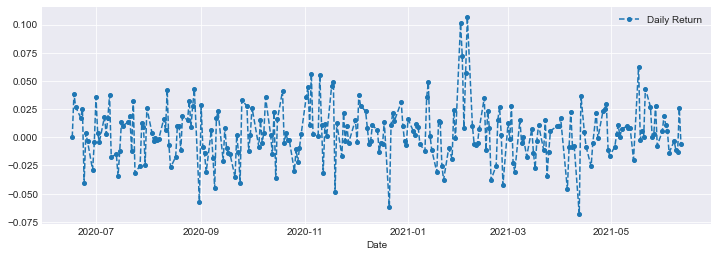

In [19]:
# Visualization of the percent change for each day of stock
data2['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

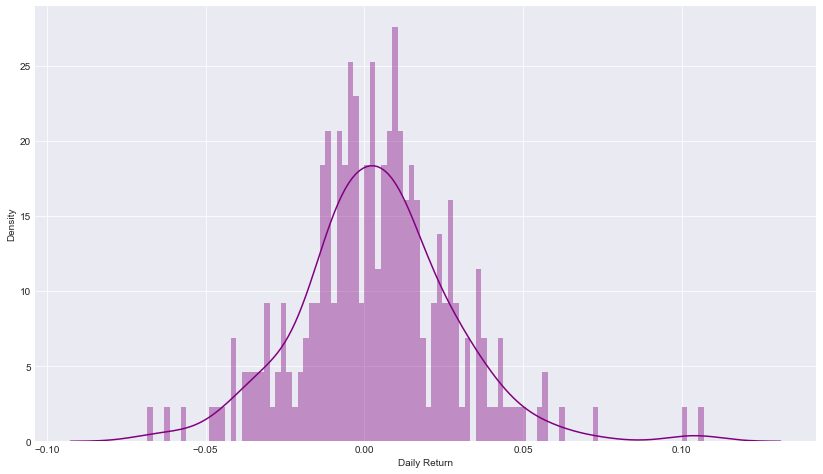

In [20]:
# Histogram to visualiza the average daily return of Apple stock
sns.distplot(data2['Daily Return'].dropna(),bins=100,color='purple')

### Visulaztion of Support And Resistance of Stock
##### The Resistance
As the name suggests, resistance is something which stops the price from rising further. The resistance level is a price point on the chart where traders expect maximum supply (in terms of selling) for the stock/index. The resistance level is always above the current market price.
##### The support
The support level is a price point on the chart where the trader expects maximum demand (in terms of buying) coming into the stock/index. Whenever the price falls to the support line, it is likely to bounce back. The support level is always below the current market price.

In [21]:
#importing libraries for calculating resistance
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14)

C:\Users\DELL\anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning:





    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/





In [22]:
df=pd.DataFrame(data, columns=['Open', 'High', 'Low', 'Close'])

In [23]:
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)
df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]

In [24]:
def isSupport(df,i):
  support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]
  return support


In [25]:
def isResistance(df,i):
  resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2]
  return resistance

In [26]:
levels = []
for i in range(2,df.shape[0]-2):
  if isSupport(df,i):
    levels.append((i,df['Low'][i]))
  elif isResistance(df,i):
    levels.append((i,df['High'][i]))

In [27]:
def plot_all():
  fig, ax = plt.subplots()
  candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)
  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()
  fig.tight_layout()
  for level in levels:
    plt.hlines(level[1],xmin=df['Date'][level[0]],\
               xmax=max(df['Date']),colors='blue')
  fig.show()

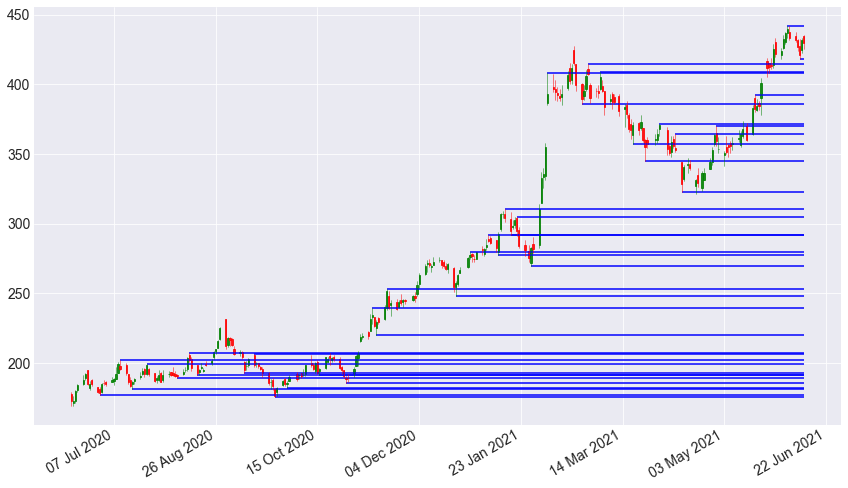

In [28]:
plot_all()

In [29]:
s =  np.mean(df['High'] - df['Low'])
def isFarFromLevel(l):
   return np.sum([abs(l-x) < s  for x in levels]) == 0
levels = []
for i in range(2,df.shape[0]-2):
  if isSupport(df,i):
    l = df['Low'][i]
    if isFarFromLevel(l):
      levels.append((i,l))
  elif isResistance(df,i):
    l = df['High'][i]
    if isFarFromLevel(l):
      levels.append((i,l))

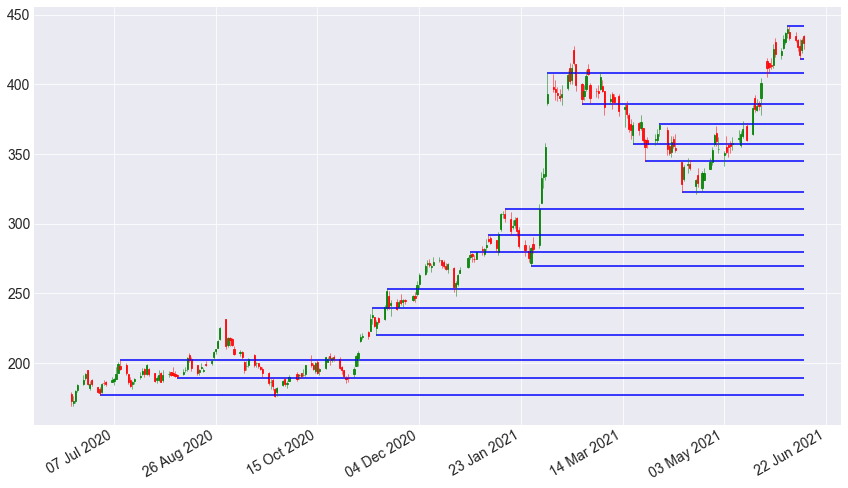

In [30]:
plot_all()

### Comparing Banks stocks using  Percentage Returns

In [31]:
#importing required data
sbi = gh(symbol='SBIN',start=start,end=end)
hdfc = gh(symbol='HDFCBANK',start=start,end=end)
axis = gh(symbol='AXISBANK',start=start,end=end)
icici = gh(symbol='ICICIBANK',start=start,end=end)

In [32]:
#creating required dataframe
banks_close=pd.DataFrame(columns = ['sbi_close', 'hdfc_close', 'axis_close', 'icici_close'])
banks_close['sbi_close'] = sbi['Close']
banks_close['hdfc_close'] = hdfc['Close']
banks_close['axis_close'] = axis['Close']
banks_close['icici_close'] = icici['Close']


In [33]:
banks_close.head()

sbi_close  hdfc_close  axis_close  icici_close
Date                                                      
2020-06-16     172.90      990.40      381.55       342.95
2020-06-17     172.95      979.25      389.60       341.95
2020-06-18     179.65     1019.95      405.40       352.00
2020-06-19     184.50     1033.35      417.05       363.80
2020-06-22     187.70     1028.75      430.15       367.55

In [34]:
# Calculate the daily return percent of all stocks and store them in a new banks returns DataFrame
bank_rets = banks_close.pct_change()

### Visualization of compared stocks using Seaborn

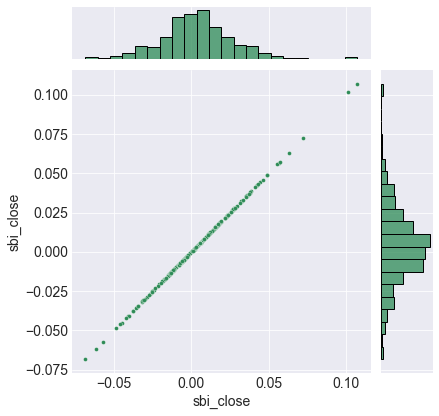

In [35]:
# Comparing Google to itself shows a perfectly linear relationship
sns.jointplot('sbi_close','sbi_close',bank_rets,kind='scatter',color='seagreen')


So now we know that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. So let's go ahead and compare stocks with each other



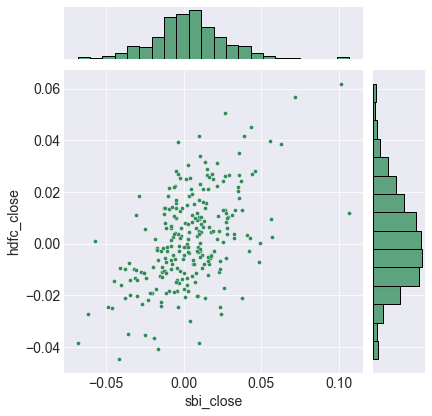

In [36]:
#Joinplot to compare the daily returns of sbi and  hdfc
sns.jointplot('sbi_close','hdfc_close',bank_rets,kind='scatter',color='seagreen')

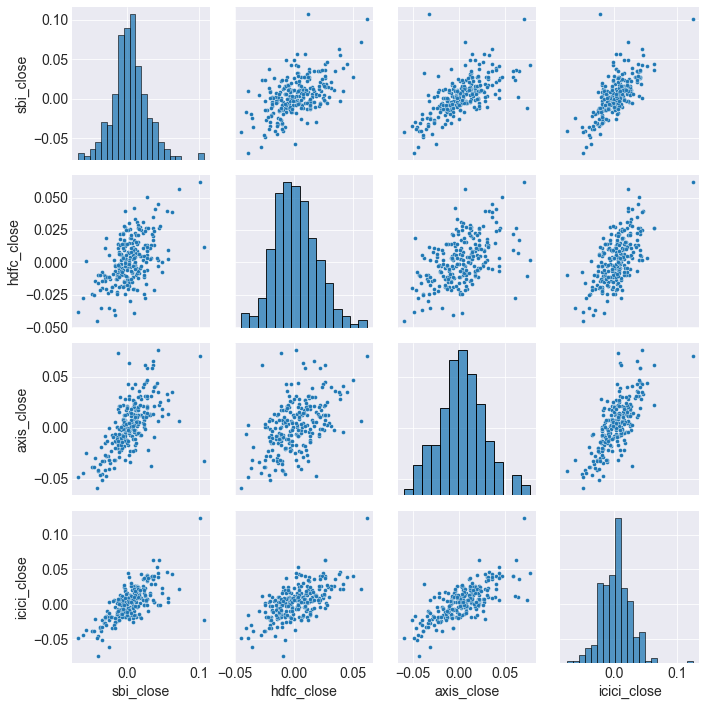

In [37]:
# Correlation analysis for every possible combination of stocks in our bank stock ticker list.
sns.pairplot(bank_rets.dropna())

<AxesSubplot:>

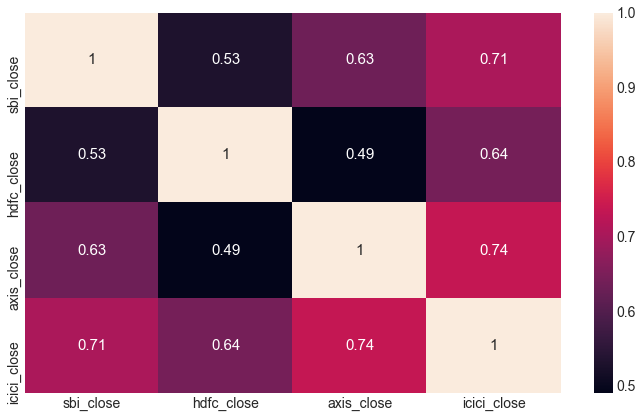

In [38]:
#correlation heatmap of bank stocks
sns.heatmap(bank_rets.corr(), annot=True, annot_kws={"size":15})

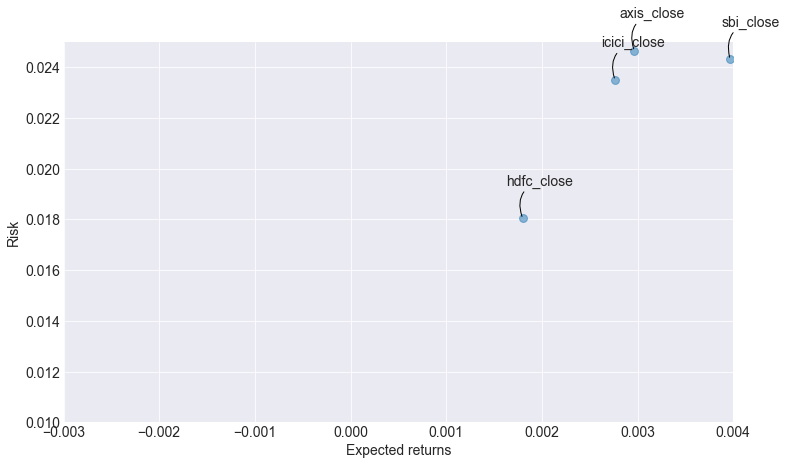

In [39]:
# Cleaning data frame by droping rows having null values
rets = bank_rets.dropna()

# Scatter plot of expected return of the stocks vs. their standard deviations of daily retunrs
area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 30),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0.5'))

It can be visulaized from the above plot that AXIS bank stock have higher risk but offers higher returns than other stocks whereas HDFC stock have lower risk but offers less return on its stock.

### Correlational Analysis of SBI stock

In [40]:
data.corr()

Prev Close      Open      High       Low      Last  \
Prev Close            1.000000  0.999191  0.997767  0.998043  0.996411   
Open                  0.999191  1.000000  0.998804  0.998948  0.997280   
High                  0.997767  0.998804  1.000000  0.998955  0.999140   
Low                   0.998043  0.998948  0.998955  1.000000  0.998743   
Last                  0.996411  0.997280  0.999140  0.998743  1.000000   
Close                 0.996555  0.997404  0.999196  0.998899  0.999962   
VWAP                  0.997856  0.998844  0.999700  0.999664  0.999339   
Volume               -0.118476 -0.103748 -0.078245 -0.105541 -0.082380   
Turnover              0.397545  0.413969  0.437601  0.412210  0.433738   
Trades                0.294217  0.307537  0.329604  0.300903  0.322913   
Deliverable Volume    0.034116  0.045852  0.068772  0.044645  0.065903   
%Deliverble           0.334819  0.332442  0.333786  0.332957  0.334357   

                       Close      VWAP    Volume  Turnover    Trades  \
Prev Close          0.996555  0.997856 -0.118476  0.397545  0.294217   
Open                0.997404  0.998844 -0.103748  0.413969  0.307537   
High                0.999196  0.999700 -0.078245  0.437601  0.329604   
Low                 0.998899  0.999664 -0.105541  0.412210  0.300903   
Last                0.999962  0.999339 -0.082380  0.433738  0.322913   
Close               1.000000  0.999445 -0.084056  0.431994  0.320850   
VWAP                0.999445  1.000000 -0.090068  0.426468  0.316264   
Volume             -0.084056 -0.090068  1.000000  0.826138  0.868815   
Turnover            0.431994  0.426468  0.826138  1.000000  0.948940   
Trades              0.320850  0.316264  0.868815  0.948940  1.000000   
Deliverable Volume  0.064365  0.057945  0.853349  0.762406  0.806694   
%Deliverble         0.334026  0.332941  0.011320  0.146702  0.163596   

                    Deliverable Volume  %Deliverble  
Prev Close                    0.034116     0.334819  
Open                          0.045852     0.332442  
High                          0.068772     0.333786  
Low                           0.044645     0.332957  
Last                          0.065903     0.334357  
Close                         0.064365     0.334026  
VWAP                          0.057945     0.332941  
Volume                        0.853349     0.011320  
Turnover                      0.762406     0.146702  
Trades                        0.806694     0.163596  
Deliverable Volume            1.000000     0.476871  
%Deliverble                   0.476871     1.000000

In [41]:
corMat = (data.iloc[:,:14].corr()).values
corMat = np.around(corMat, decimals = 3)
print(corMat)


[[ 1.     0.999  0.998  0.998  0.996  0.997  0.998 -0.118  0.398  0.294
   0.034  0.335]
 [ 0.999  1.     0.999  0.999  0.997  0.997  0.999 -0.104  0.414  0.308
   0.046  0.332]
 [ 0.998  0.999  1.     0.999  0.999  0.999  1.    -0.078  0.438  0.33
   0.069  0.334]
 [ 0.998  0.999  0.999  1.     0.999  0.999  1.    -0.106  0.412  0.301
   0.045  0.333]
 [ 0.996  0.997  0.999  0.999  1.     1.     0.999 -0.082  0.434  0.323
   0.066  0.334]
 [ 0.997  0.997  0.999  0.999  1.     1.     0.999 -0.084  0.432  0.321
   0.064  0.334]
 [ 0.998  0.999  1.     1.     0.999  0.999  1.    -0.09   0.426  0.316
   0.058  0.333]
 [-0.118 -0.104 -0.078 -0.106 -0.082 -0.084 -0.09   1.     0.826  0.869
   0.853  0.011]
 [ 0.398  0.414  0.438  0.412  0.434  0.432  0.426  0.826  1.     0.949
   0.762  0.147]
 [ 0.294  0.308  0.33   0.301  0.323  0.321  0.316  0.869  0.949  1.
   0.807  0.164]
 [ 0.034  0.046  0.069  0.045  0.066  0.064  0.058  0.853  0.762  0.807
   1.     0.477]
 [ 0.335  0.332  0.334  0

In [42]:
feature_importance = (data.iloc[:,:14].corr()).iloc[:-1, -1].sort_values(ascending=False)
print('Features in Descending Order of Importance', list(feature_importance.index))


Features in Descending Order of Importance ['Deliverable Volume', 'Prev Close', 'Last', 'Close', 'High', 'Low', 'VWAP', 'Open', 'Trades', 'Turnover', 'Volume']


In [43]:
data.head()

Symbol Series  Prev Close   Open    High     Low    Last   Close  \
Date                                                                          
2020-06-16   SBIN     EQ      173.70  178.0  178.95  169.40  172.55  172.90   
2020-06-17   SBIN     EQ      172.90  171.0  176.20  169.25  172.80  172.95   
2020-06-18   SBIN     EQ      172.95  172.4  180.65  171.10  180.00  179.65   
2020-06-19   SBIN     EQ      179.65  180.3  184.95  179.50  184.25  184.50   
2020-06-22   SBIN     EQ      184.50  185.0  191.75  184.25  187.90  187.70   

              VWAP    Volume      Turnover  Trades  Deliverable Volume  \
Date                                                                     
2020-06-16  174.16  63929925  1.113374e+15  295248             9484014   
2020-06-17  173.19  73867145  1.279334e+15  337640            10915007   
2020-06-18  176.37  58262367  1.027583e+15  274070            12595472   
2020-06-19  182.93  76897890  1.406723e+15  324544            15049467   
2020-06-22  188.68  80024673  1.509941e+15  412445            16662588   

            %Deliverble        Date  
Date                                 
2020-06-16       0.1484  2020-06-16  
2020-06-17       0.1478  2020-06-17  
2020-06-18       0.2162  2020-06-18  
2020-06-19       0.1957  2020-06-19  
2020-06-22       0.2082  2020-06-22

### Preparing and showing data for predictions

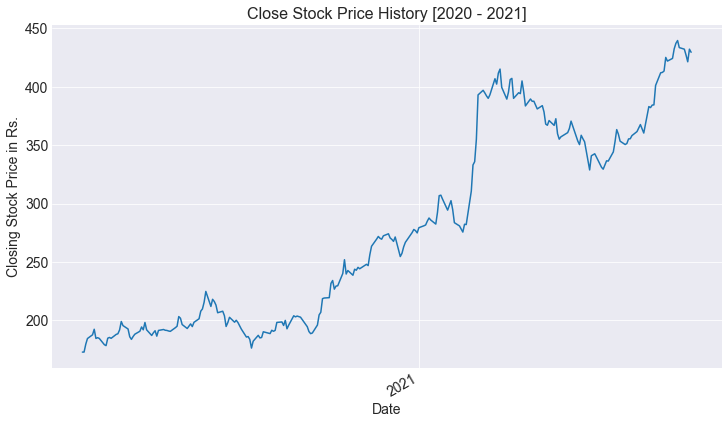

In [44]:
#selecting columns which are not highly correalted
df = pd.DataFrame(data, columns=['Deliverable Volume', 'Prev Close', 'Last', 'Close', 'High', 'Low', 'VWAP'])


# Reset index column so that we have integers to represent time for later analysis
df = df.reset_index()
import matplotlib.dates as mdates

years = mdates.YearLocator()
yearsFmt = mdates.DateFormatter('%Y') 


fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])


ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)


plt.title('Close Stock Price History [2020 - 2021]', fontsize=16)

plt.xlabel('Date', fontsize=14)

plt.ylabel('Closing Stock Price in Rs.', fontsize=14)

fig.autofmt_xdate()


plt.show()

In [45]:
#spliting data into train and test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20)

X_train = np.array(train.index).reshape(-1, 1) # reshaping into 2-d array for prediction
y_train = train['Close']


### Building Linear Regression Model for Prediction
The term “linearity” in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two-dimensional space (between two variables), we get a straight line. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x).

In [46]:
#importing liabraries and loading model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

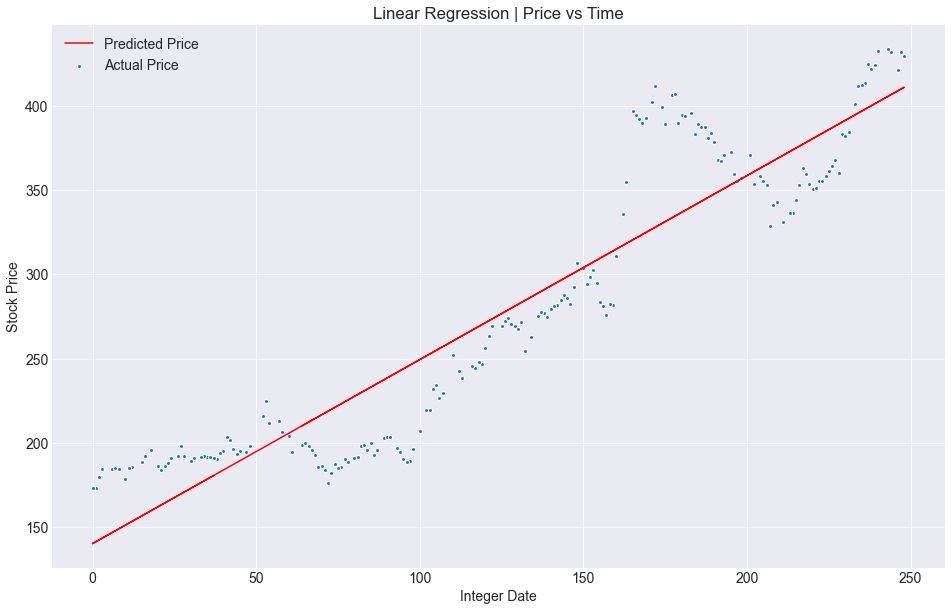

In [47]:
#comparing predicted  values with original close 
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [48]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [49]:
y_pred = model.predict(X_test)

In [50]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  1.0925854771255972
Intercept:  140.17029910804084


In [51]:
df_pred=pd.DataFrame(data, columns=['Close'])

In [52]:
#adding linear prediction column in dataset
df_pred['Prediction_LR'] = model.predict(np.array(df.index).reshape(-1, 1))

In [53]:
print("Test Accuracy:",model.score(X_test, y_test))

Test Accuracy: 0.8436939431631799


### Calculating RMSE MAE RMSE for evaluation of model

In [54]:
from sklearn import metrics

In [55]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 26.948458054455674
Mean Squared Error: 1123.9344266996968
Root Mean Squared Error: 33.52513127043199


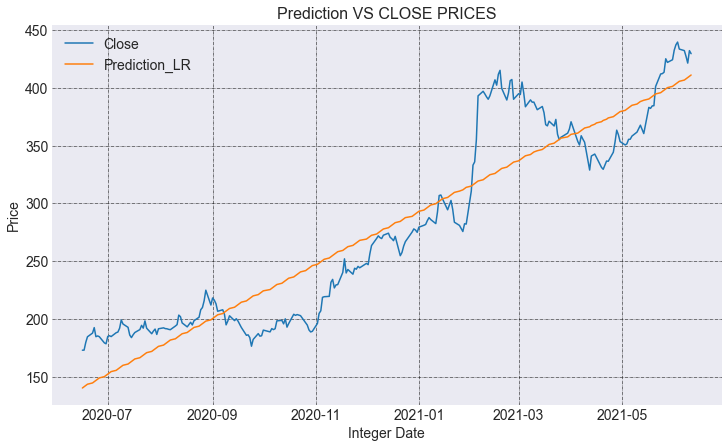

In [56]:
df_pred.plot()
# Show the legend
plt.legend()
# Define the label for the title of the figure
plt.title("Prediction VS CLOSE PRICES", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Integer Date', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

### Randomforest Regressor
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [57]:
#importing liabraries and loading model
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(n_estimators=100)
reg.fit(X_train,y_train)

RandomForestRegressor()

In [58]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [59]:
y_pred = reg.predict(X_test)

In [60]:
#adding Randomforest prediction column in dataset
df_pred['Prediction_RF'] = reg.predict(np.array(df.index).reshape(-1, 1))

In [61]:
df.head()

Date  Deliverable Volume  Prev Close    Last   Close    High     Low  \
0  2020-06-16             9484014      173.70  172.55  172.90  178.95  169.40   
1  2020-06-17            10915007      172.90  172.80  172.95  176.20  169.25   
2  2020-06-18            12595472      172.95  180.00  179.65  180.65  171.10   
3  2020-06-19            15049467      179.65  184.25  184.50  184.95  179.50   
4  2020-06-22            16662588      184.50  187.90  187.70  191.75  184.25   

     VWAP  
0  174.16  
1  173.19  
2  176.37  
3  182.93  
4  188.68

In [62]:
#accuracy of random forest model
print("Test Accuracy:",reg.score(X_test, y_test))

Test Accuracy: 0.9937242475503509


### Calculating RMSE MAE RMSE for evaluation of model

In [63]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.6773500000000805
Mean Squared Error: 45.12642935500071
Root Mean Squared Error: 6.717620810599591


### Comparing RandomForest with linear Regressor

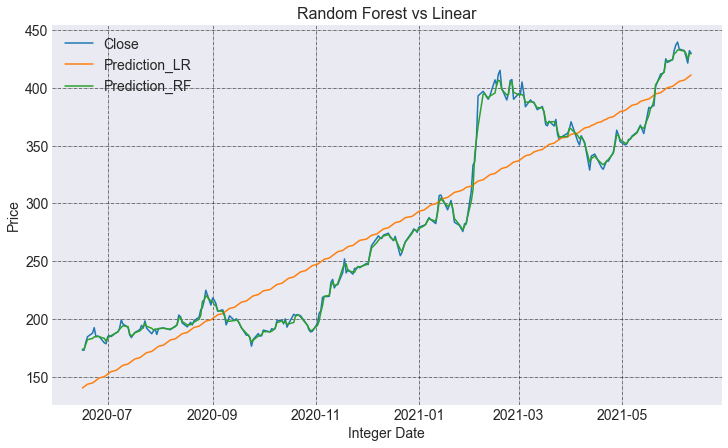

In [64]:
df_pred.plot()
# Show the legend
plt.legend()
# Define the label for the title of the figure
plt.title("Random Forest vs Linear", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Integer Date', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

### Support Vector Regressor
Support Vector Machine (SVM) is a relatively simple Supervised Machine Learning Algorithm used for classification and/or regression. It is more preferred for classification but is sometimes very useful for regression as well. Basically, SVM finds a hyper-plane that creates a boundary between the types of data. In 2-dimensional space, this hyper-plane is nothing but a line.

In [65]:
from sklearn import svm

In [66]:
clf = svm.SVR()
clf.fit(X_train,y_train)

SVR()

In [67]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [68]:
y_pred = clf.predict(X_test)

In [69]:
df_pred['Prediction_SVM'] = clf.predict(np.array(df.index).reshape(-1, 1))

### Calculating RMSE MAE RMSE for evaluation of model

In [70]:
#accuracy of SVm model
print("Test Accuracy:",clf.score(X_test, y_test))

Test Accuracy: 0.71573329718768


In [71]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 31.063740508017347
Mean Squared Error: 2044.048324939357
Root Mean Squared Error: 45.21115266103439


### Comparing all Machine Learning Models

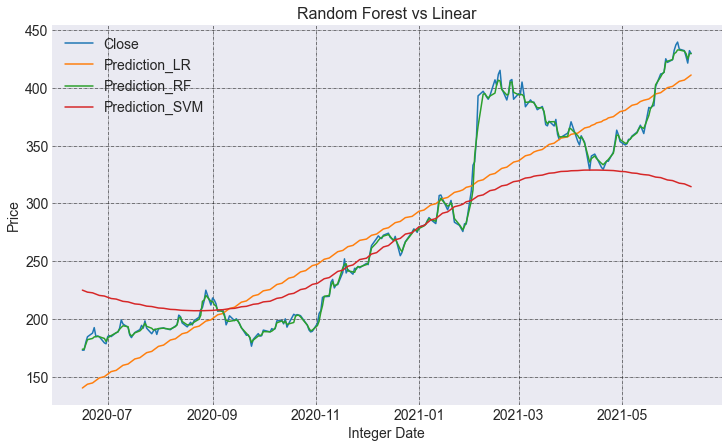

In [72]:
df_pred.plot()
# Show the legend
plt.legend()
# Define the label for the title of the figure
plt.title("Random Forest vs Linear", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Integer Date', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()